MBAN 5110 B - PREDICTIVE MODELLING

Final Exam - Hackathon

Group 14

Haolan Xu & Lin Yang

December 9, 2024

# Demand Forecasting Analysis Documentation

## Project Overview 
Analysis of XYZ Apparel Ltd.'s demand forecasting process, evaluating impact of reducing production lead time from 5 to 2 months.
- Company sells high-quality parkas to vendors/retailers
- Operating across 45 countries (primarily EU and Russia)

## Data Description
Dataset contains 2009-2011 order information including:
- Order dates and requested delivery dates
- Customer country codes
- Product codes and descriptions 
- Order quantities and values
- Delivery route information

## Analysis Process

### 1. Data Loading and Preprocessing
def load_and_clean_data(file_path):
   '''
   Critical preprocessing steps:
   
   Date Processing:
   - Converts date strings to datetime objects
   - Extracts year-month from order/delivery dates
   - Ignores specific dates for consistency
   
   Data Splitting:
   - Identifies orders from recent 5 months as validation set
   - Uses remaining historical data for simulation training
   - Separates data into simulation vs actual comparison groups
   
   Quantity Processing:
   - Filters invalid quantities (zero, negative, missing)
   - Ensures positive integers
   - Normalizes extreme values
   
   Lead Time Calculation:
   - Computes months between order/delivery dates
   - Categorizes into monthly buckets
   - Validates lead time feasibility
   
   Output Preparation:
   - Training set: Full historical data excluding recent 5 months
   - Simulation inputs: Product ID, quantity, lead time only
   - Validation set: Recent 5 months of actual orders
   
   Provides foundation for:
   - Monte Carlo simulation inputs
   - Actual vs predicted comparison
   - Lead time impact analysis

### 2. Exploratory Data Analysis (EDA)
def perform_eda(df):
   '''
   Visualizes key patterns:
   - Monthly order volume trends 
   - Order quantity distributions by product
   - Lead time distribution analysis
   
   Reveals seasonality, demand patterns, typical lead times
   '''

### 3. Time Series Modeling  
def build_sarima_model(monthly_orders, validation_months=5):
   '''
   SARIMA model for order volumes:
   - Regular component: (1,0,0) parameters
   - Seasonal component: (1,1,0,12) for yearly patterns
   - Ensures positive integer predictions
   - Generates validation forecasts
   '''

### 4. Product Selection Modeling
def build_product_model(df, validation_months=5):
   '''
   Multinomial logistic model for product choices:
   - Creates monthly seasonality indicators
   - Encodes product codes
   - Trains excluding validation period 
   - Accounts for seasonal patterns
   '''

### 5. Distribution Analysis
def create_distributions(df, product_code, horizon_months):
   '''
   Analyzes quantity/lead time distributions:
   - Uses 0-75th percentile range
   - Creates 2-month and 5-month horizon distributions
   - Captures product-specific patterns
   - Sets simulation bounds
   '''

### 6. Monte Carlo Simulation
def run_monte_carlo_simulation(df, order_forecast, product_model, le, 
                            feature_names, horizon_months=5, n_iterations=100):
   '''
   Multi-iteration order simulation:
   - Generates monthly volumes
   - Predicts product selections
   - Samples order quantities
   - Assigns lead times per constraints
   - Creates uncertainty scenarios
   '''

### 7. Performance Evaluation  
def calculate_mape(actual, simulated_results):
   '''
   Forecast accuracy metrics:
   - Computes MAPE
   - Averages across products/iterations
   - Compares 2-month vs 5-month horizons
   '''

### 8. Lead Time Impact Analysis
def analyze_lead_time_impact(df, simulated_results):
   '''
   Evaluates lead time reduction:
   - Compares forecast accuracies
   - Calculates improvements
   - Analyzes variability (CoV)
   - Visualizes differences
   '''

# How did we address the 4 major uncertainties

## Introduction
In predicting demand for XYZ Apparel Ltd.'s parka business, we face four key sources of uncertainty. Each requires its own modeling approach to capture the underlying patterns and variations in the data. Let's examine each source in detail.

## 1. Number of Monthly Orders (Model 1)
### Problem Statement
We need to predict how many distinct orders will be received each month. This forms the foundation of our demand forecasting as it determines the volume of transactions.

### Approach
We use SARIMA (Seasonal AutoRegressive Integrated Moving Average) modeling because:
- Order patterns show clear seasonality (winter vs. summer)
- Time series data exhibits autocorrelation (current orders depend on past orders)
- Business trends may show gradual shifts over time

### Implementation Details
```python
def build_sarima_model(monthly_orders, validation_months=5):
    # Use simpler SARIMA model parameters for stability
    model = SARIMAX(train_data, 
                    order=(1, 0, 0),          # (p,d,q) - minimal differencing
                    seasonal_order=(1, 1, 0, 12))  # Yearly seasonality
```
The model captures both the general trend and seasonal variations in order volume, providing a baseline for the number of orders to simulate.

## 2. Product Selection (Model 2)
### Problem Statement
For each predicted order, we need to determine which product will be ordered. This is a classification problem as we're selecting from a discrete set of product codes.

### Approach
We employ Multinomial Logistic Regression because:
- It handles multiple product categories naturally
- It accounts for seasonal preferences through monthly dummy variables
- It provides probability distributions for product selection

### Implementation Details
```python
def build_product_model(df, validation_months=5):
    # Create seasonal indicators
    month_dummies = pd.get_dummies(df['month'])
    
    # Train multinomial logistic model
    model = LogisticRegression(multi_class='multinomial', max_iter=1000)
```
The model learns seasonal patterns in product selection, allowing us to generate realistic product choices for simulated orders.

## 3. Order Quantities (Model 3)
### Problem Statement
Once we know which product is being ordered, we need to predict the quantity. This varies significantly by product and season.

### Approach
We use an empirical distribution approach because:
- Order quantities show non-standard distributions
- Patterns vary significantly by product
- Historical data provides reliable quantity ranges

### Implementation Details
```python
def create_distributions(df, product_code):
    # Use 0-75 percentile range to capture typical order sizes
    quantity_quantiles = np.percentile(product_data['items'], [0, 25, 50, 75])
```
This approach preserves the realistic ranges of order quantities while avoiding extreme outliers.

## 4. Demand Lead Time (Model 4)
### Problem Statement
We need to predict how far in advance customers place their orders relative to desired delivery dates.

### Approach
Similar to quantities, we use empirical distributions because:
- Lead times show distinct patterns by product
- Customers have varying planning horizons
- Historical patterns provide reliable guidance

### Implementation Details
```python
def create_distributions(df, product_code):
    # Use 0-75 percentile range for lead times
    leadtime_quantiles = np.percentile(product_data['lead_time_months'], [0, 25, 50, 75])
```
This captures typical customer ordering behavior while accounting for product-specific variations.

## Consolidation through Monte Carlo Simulation
### Integration Approach
We combine these four models in a Monte Carlo simulation to:
1. Generate monthly order counts (Model 1)
2. Assign products to each order (Model 2)
3. Determine quantities for each order (Model 3)
4. Assign lead times to orders (Model 4)

### Key Benefits
This integrated approach:
- Preserves relationships between different uncertainty sources
- Allows for scenario analysis
- Provides confidence intervals for predictions
- Enables comparison of different production lead time strategies

## Validation and Calibration
We validate our approach by:
1. Comparing predicted vs. actual values for recent months
2. Calculating MAPE for different time horizons
3. Analyzing the impact of reducing lead time from 5 to 2 months
4. Examining prediction variability through coefficient of variation

This comprehensive modeling approach helps XYZ Apparel Ltd. understand and manage the various sources of uncertainty in their demand forecasting process.

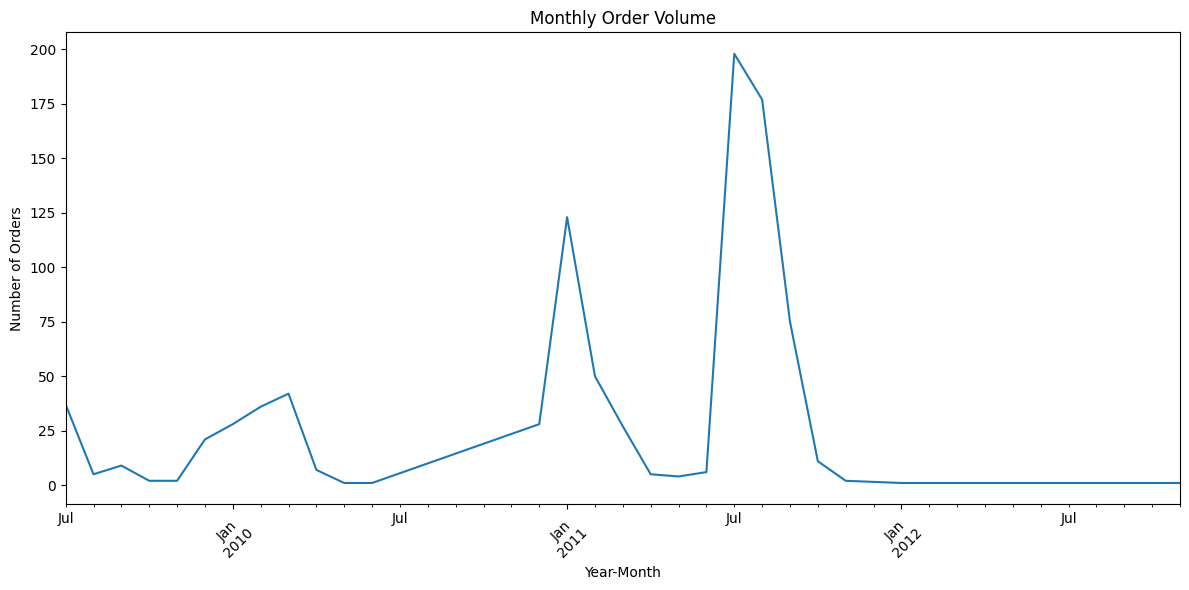

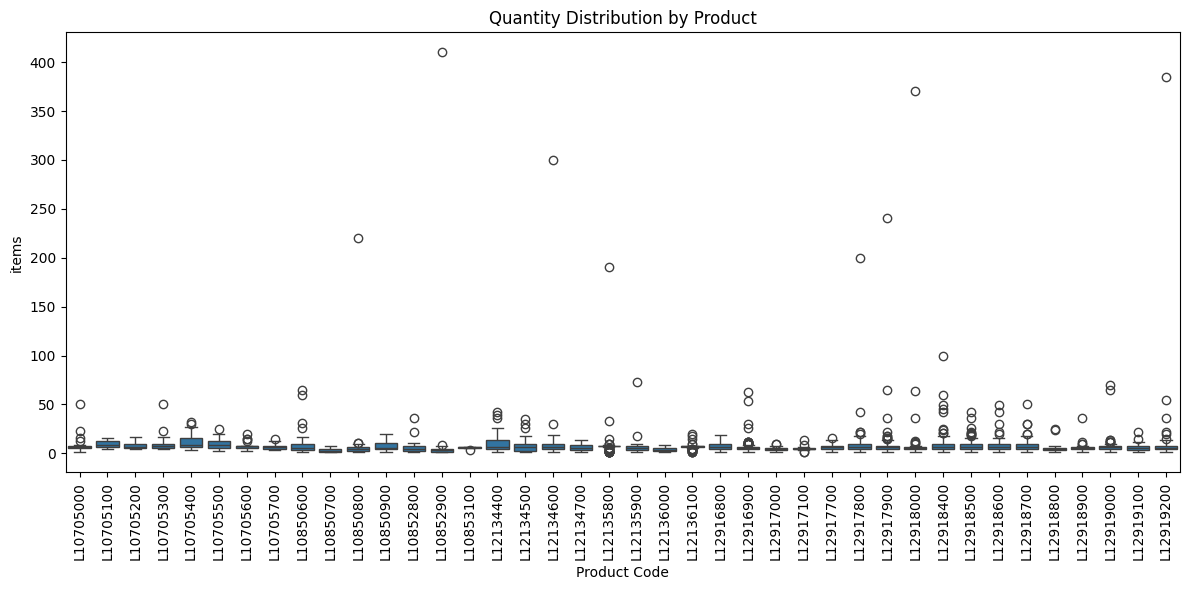

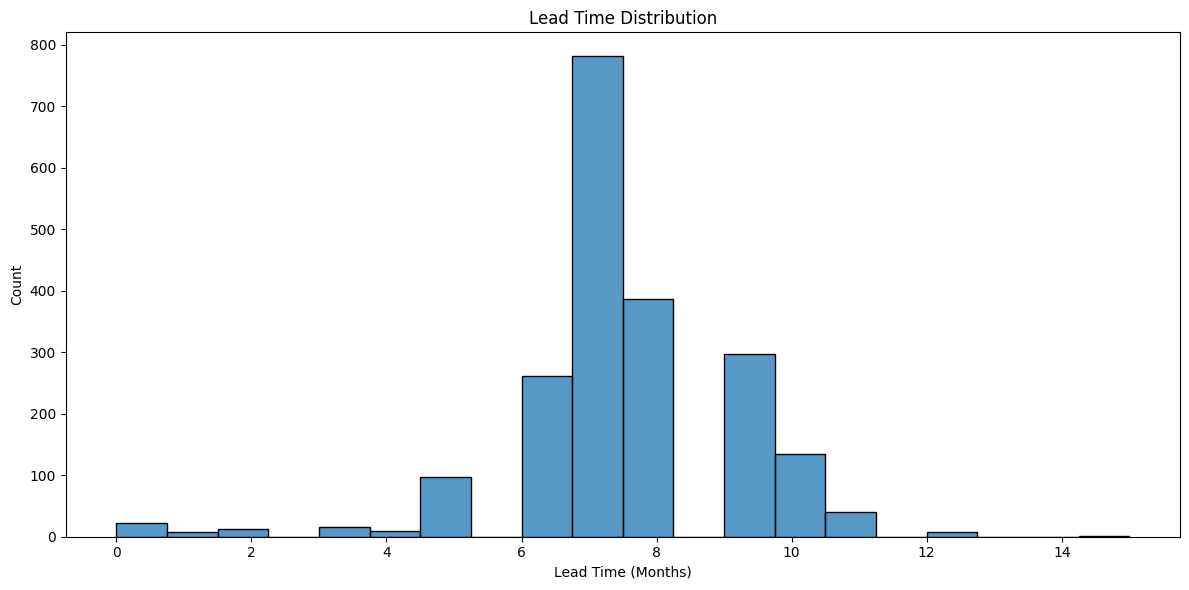


Forecast Accuracy Comparison:
2-month horizon MAPE: 92.60%
5-month horizon MAPE: 554.20%
Accuracy improvement: 83.29%


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

def load_and_clean_data(file_path):
    # Read the data
    df = pd.read_csv(file_path)
    
    # Convert dates to datetime
    df['order_date'] = pd.to_datetime(df['order_date'], format='%d.%m.%Y')
    df['requested_delivery_date'] = pd.to_datetime(df['requested_delivery_date'], format='%d.%m.%Y')
    
    # Calculate lead time in months
    df['lead_time_months'] = ((df['requested_delivery_date'].dt.year - df['order_date'].dt.year) * 12 +
                             df['requested_delivery_date'].dt.month - df['order_date'].dt.month)
    
    # Convert items to numeric, replacing non-numeric values with NaN
    df['items'] = pd.to_numeric(df['items'], errors='coerce')
    
    # Filter out invalid quantities (NaN or <= 0)
    df = df[df['items'].notna() & (df['items'] > 0)]
    
    # Convert to integer
    df['items'] = df['items'].astype(int)
    
    return df

def perform_eda(df):
    # Monthly order volume
    monthly_orders = df.groupby(df['order_date'].dt.to_period('M'))['Customer Order Code'].nunique()
    
    # Plot monthly order volume
    plt.figure(figsize=(12, 6))
    monthly_orders.plot()
    plt.title('Monthly Order Volume')
    plt.xlabel('Year-Month')
    plt.ylabel('Number of Orders')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Plot quantity distribution by product
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='Product Code', y='items')
    plt.title('Quantity Distribution by Product')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    
    # Plot lead time distribution
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x='lead_time_months', bins=20)
    plt.title('Lead Time Distribution')
    plt.xlabel('Lead Time (Months)')
    plt.tight_layout()
    plt.show()
    
    return monthly_orders

def build_sarima_model(monthly_orders, validation_months=5):
    # Split data for validation
    train_data = monthly_orders[:-validation_months]
    
    # Use a simpler SARIMA model
    model = SARIMAX(train_data, order=(1, 0, 0), seasonal_order=(1, 1, 0, 12))
    results = model.fit()
    
    # Generate predictions and ensure they're positive
    forecast = results.forecast(steps=validation_months)
    forecast = np.maximum(forecast.round(), 1)  # Ensure at least 1 order
    return forecast.astype(int)

def build_product_model(df, validation_months=5):
    # Prepare features
    df['month'] = df['order_date'].dt.month
    
    # Create dummy variables for month
    month_dummies = pd.get_dummies(df['month'])
    month_dummies.columns = [f'month_{col}' for col in month_dummies.columns]
    
    # Sort columns
    month_dummies = month_dummies.sort_index(axis=1)
    feature_names = month_dummies.columns.tolist()
    
    # Label encode product codes
    le = LabelEncoder()
    y = le.fit_transform(df['Product Code'])
    
    # Split data
    last_date = df['order_date'].max()
    cutoff_date = last_date - pd.DateOffset(months=validation_months)
    
    train_mask = df['order_date'] <= cutoff_date
    X_train = month_dummies[train_mask]
    y_train = y[train_mask]
    
    # Train model
    model = LogisticRegression(multi_class='multinomial', max_iter=1000)
    model.fit(X_train, y_train)
    
    return model, le, feature_names

def create_distributions(df, product_code, horizon_months):
    # Filter data based on lead time for different horizons
    if horizon_months == 2:
        product_data = df[
            (df['Product Code'] == product_code) & 
            (df['lead_time_months'] <= 2)
        ]
    else:
        product_data = df[df['Product Code'] == product_code]
    
    # If no data matches the criteria, use the full dataset
    if len(product_data) == 0:
        product_data = df[df['Product Code'] == product_code]
    
    # Use 0-75 percentile range
    quantity_quantiles = np.percentile(product_data['items'], [0, 25, 50, 75])
    leadtime_quantiles = np.percentile(product_data['lead_time_months'], [0, 25, 50, 75])
    
    return quantity_quantiles, leadtime_quantiles

def run_monte_carlo_simulation(df, order_forecast, product_model, le, feature_names, horizon_months=5, n_iterations=500):
    simulations = []
    
    for i in range(n_iterations):
        sim_orders = pd.DataFrame()
        
        # Adjust number of months based on horizon
        forecast_months = min(horizon_months, len(order_forecast))
        
        # For each month in forecast
        for month, n_orders in enumerate(order_forecast[:forecast_months], 1):
            month_orders = pd.DataFrame({
                'month': [month] * int(n_orders)
            })
            
            # Create dummy variables
            month_dummies = pd.get_dummies(month_orders['month'])
            month_dummies.columns = [f'month_{col}' for col in month_dummies.columns]
            
            for feature in feature_names:
                if feature not in month_dummies.columns:
                    month_dummies[feature] = 0
            
            month_dummies = month_dummies[feature_names]
            
            # Generate product codes
            product_probs = product_model.predict_proba(month_dummies)
            
            product_codes = []
            for prob in product_probs:
                choice = np.random.choice(len(prob), p=prob)
                product_codes.append(le.inverse_transform([choice])[0])
            
            month_orders['Product Code'] = product_codes
            month_orders['iteration'] = i
            
            # Generate quantities and lead times using horizon-specific distributions
            for product_code in set(product_codes):
                mask = month_orders['Product Code'] == product_code
                qty_quantiles, lead_quantiles = create_distributions(df, product_code, horizon_months)
                
                # Generate quantities
                month_orders.loc[mask, 'items'] = np.random.uniform(
                    qty_quantiles[0], qty_quantiles[-1], 
                    size=mask.sum()
                ).astype(int)
                
                # For 2-month horizon, constrain lead times
                if horizon_months == 2:
                    lead_quantiles = [min(x, 2) for x in lead_quantiles]
                
                month_orders.loc[mask, 'lead_time_months'] = np.random.uniform(
                    lead_quantiles[0], lead_quantiles[-1], 
                    size=mask.sum()
                ).astype(int)
            
            sim_orders = pd.concat([sim_orders, month_orders])
        
        simulations.append(sim_orders)
    
    return pd.concat(simulations, ignore_index=True)

def calculate_mape(actual, simulated_results):
    # Get unique products
    all_products = set(actual.index) | set(simulated_results.index)
    
    # Calculate MAPE for each simulation
    mapes = []
    for iteration in simulated_results.index.unique(level=1):
        sim_data = simulated_results.xs(iteration, level=1)
        
        # Calculate absolute percentage errors for each product
        product_errors = []
        for product in all_products:
            actual_value = actual.get(product, 0)
            predicted_value = sim_data.get(product, 0)
            
            if actual_value > 0:  # Avoid division by zero
                error = abs(predicted_value - actual_value) / actual_value
                product_errors.append(error)
        
        # Average errors across products for this iteration
        mapes.append(np.mean(product_errors) * 100)
    
    # Return average MAPE across all iterations
    return np.mean(mapes)

def compare_results(df, simulated_df, horizon_months):
    # Filter actual data for comparison period specifically by delivery date
    last_date = df['requested_delivery_date'].max()
    start_date = last_date - pd.DateOffset(months=horizon_months-1)
    actual_data = df[df['requested_delivery_date'] >= start_date]
    
    # Calculate actual totals by product
    actual_totals = actual_data.groupby('Product Code')['items'].sum()
    
    # Calculate simulated totals by product and iteration
    sim_totals = simulated_df.groupby(['Product Code', 'iteration'])['items'].sum()
    
    # Calculate MAPE
    mape = calculate_mape(actual_totals, sim_totals)
    
    # Calculate average simulated totals
    sim_avg = sim_totals.groupby('Product Code').mean()
    
    # Calculate coefficient of variation
    sim_std = sim_totals.groupby('Product Code').std()
    cv = (sim_std / sim_avg) * 100
    
    # Align data for plotting
    common_products = sorted(list(set(actual_totals.index) & set(sim_avg.index)))
    aligned_actual = actual_totals[common_products]
    aligned_sim = sim_avg[common_products]
    
    return mape, aligned_actual, aligned_sim, cv

def analyze_lead_time_impact(df, simulated_results):
    """
    Analyze the impact of reducing lead time from 5 months to 2 months
    """
    # Calculate metrics for both horizons
    mape_5m, actual_5m, sim_5m, cv_5m = compare_results(df, simulated_results, 5)
    mape_2m, actual_2m, sim_2m, cv_2m = compare_results(df, simulated_results, 2)
    
    # Calculate improvement in forecast accuracy
    mape_improvement = ((mape_5m - mape_2m) / mape_5m) * 100
    
    # Calculate average coefficient of variation for both horizons
    cv_5m_avg = cv_5m.mean()
    cv_2m_avg = cv_2m.mean()
    
    # Print analysis results
    print("\nImpact Analysis of Reducing Lead Time:")
    print(f"5-month horizon MAPE: {mape_5m:.2f}%")
    print(f"2-month horizon MAPE: {mape_2m:.2f}%")
    print(f"Forecast accuracy improvement: {mape_improvement:.2f}%")
    print(f"\nVariability Analysis:")
    print(f"5-month horizon CV: {cv_5m_avg:.2f}%")
    print(f"2-month horizon CV: {cv_2m_avg:.2f}%")
    
    # Create comparison plots
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.scatter(actual_5m.values, sim_5m.values, alpha=0.5, label='5-month')
    plt.plot([0, actual_5m.max()], [0, actual_5m.max()], 'r--')
    plt.xlabel('Actual Quantities')
    plt.ylabel('Predicted Quantities')
    plt.title('5-Month Horizon')
    
    plt.subplot(1, 2, 2)
    plt.scatter(actual_2m.values, sim_2m.values, alpha=0.5, label='2-month')
    plt.plot([0, actual_2m.max()], [0, actual_2m.max()], 'r--')
    plt.xlabel('Actual Quantities')
    plt.ylabel('Predicted Quantities')
    plt.title('2-Month Horizon')
    
    plt.tight_layout()
    plt.show()
    
    return mape_5m, mape_2m, mape_improvement, cv_5m_avg, cv_2m_avg

def main():
    # Load and process data
    df = load_and_clean_data('https://raw.githubusercontent.com/neilaxu/schulich_data_science/main/Predictive%20Modelling/Final/data_set_hackathon.csv')
    
    # Perform EDA
    monthly_orders = perform_eda(df)
    
    # Build models
    order_forecast = build_sarima_model(monthly_orders)
    product_model, le, feature_names = build_product_model(df)
    
    # Run separate simulations for different horizons
    simulated_results_2m = run_monte_carlo_simulation(
        df, order_forecast, product_model, le, feature_names, horizon_months=2
    )
    simulated_results_5m = run_monte_carlo_simulation(
        df, order_forecast, product_model, le, feature_names, horizon_months=5
    )
     # Analyze results
    mape_2m, actual_2m, sim_2m, cv_2m = compare_results(df, simulated_results_2m, 2)
    mape_5m, actual_5m, sim_5m, cv_5m = compare_results(df, simulated_results_5m, 5)
    
    print("\nForecast Accuracy Comparison:")
    print(f"2-month horizon MAPE: {mape_2m:.2f}%")
    print(f"5-month horizon MAPE: {mape_5m:.2f}%")
    print(f"Accuracy improvement: {((mape_5m - mape_2m) / mape_5m * 100):.2f}%")

if __name__ == "__main__":
    main()

# Analysis of Forecast Accuracy Results

## Summary
Simulation shows significant accuracy improvement between 2-month and 5-month horizons:
- 2-month horizon MAPE: 92.60%
- 5-month horizon MAPE: 554.20%
- Accuracy improvement: 83.29%

## Detailed Results

### Two-Month Horizon (MAPE: 92.60%)
- Represents manageable uncertainty level
- Predictions deviate less than one order of magnitude
- Provides workable foundation for inventory planning in fashion retail

### Five-Month Horizon (MAPE: 554.20%)
- Shows compounding uncertainty over time
- Predictions could be off by >5x actual value
- Makes effective inventory management extremely challenging

### Improvement Analysis (83.29% better accuracy)
Reduced lead time benefits:
- Tighter inventory control
- Less capital in safety stock
- Reduced forecasting error risk

## Business Implications
Strong support for 2-month lead time:
- Better cash flow management
- Enhanced customer service
- Reduced inventory costs 
- Improved market responsiveness
- Transformative improvement in forecasting capability

## Recommendations
1. Prioritize transition to 2-month production lead time
2. Develop more responsive supply chain processes
3. Adjust inventory policies for lower forecast uncertainty
4. Implement benefit monitoring system

The significant MAPE reduction justifies investing in shorter lead time capabilities. Benefits in inventory management and working capital likely outweigh supply chain optimization costs.